# Assignment 4 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial 8 notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial 9 notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture 9 presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

# student id : 20566706

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [32]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [33]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [34]:
# !pip install wn
# !python -m wn download omw-he:1.4

In [35]:
# word net
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [36]:
# !pip install hebrew_tokenizer

In [37]:
# tokenizer:
import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [38]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [39]:
df_train.head(8)
df_train.shape
df_test.head(8)
df_test.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...
5,5,בפעם האחרונה שהייתי מחוץ לארץ ישראל הייתי באפר...
6,6,בשנת 2018 קיבלתי החלטה שאני מתחיל ללמוד לתואר ...
7,7,"בנובמבר האחרון הייתי עם חברים בטיול ים אל ים, ..."


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [40]:
# start by some EDA lets see if we have some missing values and the number 
# of men and women in data 

df_test.isnull().sum()
df_train.isnull().sum()

df_train[df_train.gender=='f'].size

df_train[df_train.gender=='m'].size

# i want to replace all the string vals with 0/1 accoring to female/male
df_train.gender.replace({'f':0,'m':1},inplace=True)

df_train.head()



# vectorizer = CountVectorizer()
# matrix = vectorizer.fit_transform(df_train['story'])

# words_df = pd.DataFrame(matrix.toarray(),
#                         columns=vectorizer.get_feature_names())
# words_df

test_example_id    0
story              0
dtype: int64

story     0
gender    0
dtype: int64

356

1150

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",1
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",1
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,0


# Number of male/female stories

<Figure size 432x288 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fdad40ea190>,
 [Text(2.431076434376939, 2.2315616438308643, 'female'),
  Text(-2.431076434376939, -2.2315616438308643, 'male')])

Text(0.5, 1.0, 'Number of male female stories')

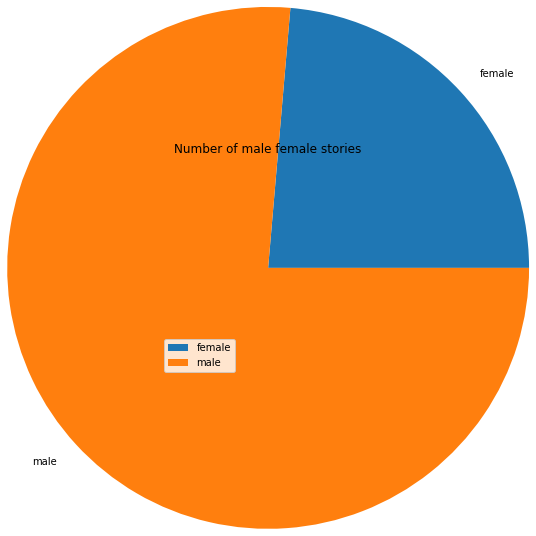

In [41]:
plt.figure()
plt.pie([df_train[df_train.gender==0].size,df_train[df_train.gender==1].size],labels=['female','male'],radius=3)
plt.title('Number of male female stories')
plt.legend(loc='lower left')
plt.show()

 # regexClassifier - trying to classify with regex statments
 # all words ending with 'ת' and finding all words which ending with ״ת״ and are verbs

In [42]:
he = wn.Wordnet('omw-he:1.4')

def regexClassifer(df_train):
    df_train['odds'] = 0  ##female is more 0 male is more 1


    def findAwomen(row):
        lemmas = re.findall(r'אני+ +\b\w+ת\b',row['story'])
        are_verbs = []
        for sentence in lemmas:
            are_verbs.append(sentence.split(' ')[1]) ##add the verb itself
        if len(are_verbs)>0:
                # if (he.words(verb)[0].pos == 'r' or he.words(verb)[0].pos == 'v'): ##if the word is a verb or adverb
            row['odds'] -= 100

        if re.findall(r'בת זוגתי',row['story']): ##if he says my girlfriend
            row['odds'] += 100
        if re.findall(r'אי*שתי',row['story']): ##if he says my wife
            row['odds'] += 100
        if re.findall(r'בעלי',row['story']): ##if he says my wife
            row['odds'] -= 100
        if re.findall(r'בן זוגי',row['story']):
            row['odds'] -= 100
        if re.findall(r'חברה שלי',row['story']):
            row['odds'] += 100   
        if re.findall(r'חבר שלי',row['story']):
            row['odds'] -= 100  
        return row

    df_train = df_train.apply(findAwomen,axis = 1)
    df_train.drop(columns=['story'])
    return df_train


df_train = regexClassifer(df_train)



In [43]:

#i want to count the amount of verbs,adverb,nouns and adjectives men and females using 


df_train['n'] = 0
df_train['v'] = 0 
df_train['r'] = 0  
df_train['a'] = 0                 
for index,row in df_train.iterrows():
	tokens = ht.tokenize(row['story'])
	for grp, token, token_num, (start_index, end_index) in tokens:
			if grp == 'HEBREW' and len(he.words(token))==1:
				df_train.loc[index,he.words(token)[0].pos]+=1
df_train
				


,story,gender,odds,n,v,r,a
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",1,0,36,4,19,4
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1,0,22,4,11,4
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0,0,27,6,22,4
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",1,0,34,5,18,4
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,0,0,18,3,19,2
...,...,...,...,...,...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,1,0,24,4,14,1
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,1,0,24,3,22,11
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,1,0,26,5,20,4
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",0,100,34,14,18,4


# df_train


In [44]:
df_train.describe()

,gender,odds,n,v,r,a
count,753.000,753.000,753.000,753.000,753.000,753.000
mean,0.764,-16.999,25.841,3.457,17.817,4.349
std,0.425,67.462,9.248,2.601,7.874,2.842
min,0.000,-300.000,0.000,0.000,1.000,0.000
25%,1.000,-100.000,20.000,2.000,13.000,2.000
50%,1.000,0.000,25.000,3.000,17.000,4.000
75%,1.000,0.000,31.000,5.000,22.000,6.000
max,1.000,200.000,64.000,17.000,49.000,21.000


In [45]:
print('number of zero noun rows : ' ,(df_train['n'] == 0).sum())
print('number of zero verb rows : ' ,(df_train['v'] == 0).sum())
print('number of zero adjective rows : ' ,(df_train['r'] == 0).sum())
print('number of zero adverb rows : ' ,(df_train['a'] == 0).sum())

number of zero noun rows :  1
number of zero verb rows :  75
number of zero adjective rows :  0
number of zero adverb rows :  34


# because the numbers are low and usually we can use adverb insted of verb while talking i have decided to not manipulate those zero rows above ,moreover it can be that wordnet caught the word and I couldnt decide if it is verb,adverb,noun or adjective because we had few options

In [46]:
df_train

,story,gender,odds,n,v,r,a
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",1,0,36,4,19,4
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1,0,22,4,11,4
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0,0,27,6,22,4
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",1,0,34,5,18,4
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,0,0,18,3,19,2
...,...,...,...,...,...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,1,0,24,4,14,1
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,1,0,24,3,22,11
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,1,0,26,5,20,4
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",0,100,34,14,18,4


<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

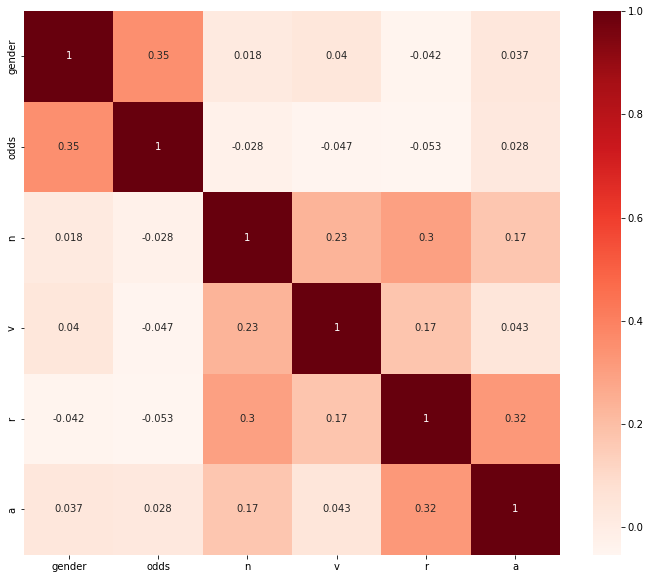

In [47]:

n=(df_train['n']-df_train['n'].min())/(df_train['n'].max()-df_train['n'].min())
df_train['n'] = n

v=(df_train['v']-df_train['v'].min())/(df_train['v'].max()-df_train['v'].min())
df_train['v'] = v

r=(df_train['r']-df_train['r'].min())/(df_train['r'].max()-df_train['r'].min())
df_train['r'] = r

a=(df_train['a']-df_train['a'].min())/(df_train['a'].max()-df_train['a'].min())
df_train['a'] = a


plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


# didnt find any good match with counting nouns,verbs etc and odds

In [48]:
df_train

,story,gender,odds,n,v,r,a
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",1,0,0.562,0.235,0.375,0.190
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1,0,0.344,0.235,0.208,0.190
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0,0,0.422,0.353,0.438,0.190
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",1,0,0.531,0.294,0.354,0.190
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,0,0,0.281,0.176,0.375,0.095
...,...,...,...,...,...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,1,0,0.375,0.235,0.271,0.048
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,1,0,0.375,0.176,0.438,0.524
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,1,0,0.406,0.294,0.396,0.190
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",0,100,0.531,0.824,0.354,0.190


In [49]:
df_train.drop(columns=['n','v','r','a','odds'],inplace=True)
df_train.gender.replace({0:'f',1:'m'},inplace=True)
df_train

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,m
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,m
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,m
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",f


In [50]:
# v = TfidfVectorizer()
# x = v.fit_transform(df_train['story'])
# df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())

# df1   ##before dropping irrleveant cols

# col_to_drop = []

# for story in df_train['story']:
# 	for word in story:
# 		for grp, token, token_num, (start_index, end_index) in ht.tokenize(word):
# 			if grp!='HEBREW':
# 				word = ' '
    



# df1.drop(columns = col_to_drop,inplace=True,errors= 'ignore')
# df_train = pd.concat([df_train, df1], axis=1)
# df_train ##after dropping irrlevant cols




In [51]:
def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)
def remove_digits(text):
    table = str.maketrans("", "", string.digits)
    return text.translate(table)
def remove_english_alpha(text):
    return re.sub('[a-zA-Z]+', '', text)

def create_corpus_tk(df):
    text  = ' '.join(df)
    tokens = ht.tokenize(text)
    clean_tokens = list(filter(lambda x: (x[0]=='HEBREW'),tokens))
    clean_tokens = [tuple[1] for tuple in clean_tokens]
    return clean_tokens
def finde_stopwords(df):
    text  = ' '.join(df)
    tokens = ht.tokenize(text)
    clean_tokens = list(filter(lambda x: (x[0]=='HEBREW' and len(x[1])<3),tokens))
    clean_tokens = [tuple[1] for tuple in clean_tokens]
    return clean_tokens

def remove_stopwords(text,stop):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)


In [52]:
# clean dtaframe
import string
from collections import Counter
df_train["story"] = df_train.story.map(lambda x: remove_punct(x))
df_train["story"] = df_train.story.map(lambda x: remove_digits(x))
df_train["story"] = df_train.story.map(lambda x: remove_english_alpha(x))
#word that len is less then 3
stop_words = finde_stopwords(df_train["story"])
df_train["story"] = df_train.story.map(lambda x: remove_stopwords(x,stop_words))
corpus = create_corpus_tk(df_train["story"])
most_common = Counter(corpus).most_common()
words, counts = zip(*most_common)

In [53]:
def metrics_classification_report(clf,x_test,y_test):
    predict = clf.predict(x_test)
    df = pd.DataFrame(metrics.confusion_matrix(y_pred=predict ,y_true=y_test),  columns=["f","m"],index=["f","m"])
    return metrics.classification_report(y_test,predict),np.mean(predict == y_test),df

def confusion_matrix_plot():
    print(pd.DataFrame(metrics.confusion_matrix(y_pred=y_pred ,y_true=test_data.target),  columns=df_train.target_names,index=train_data.target_names))

In [54]:
X_train,X_test,y_train,y_test = train_test_split(df_train['story'],df_train['gender'],test_size = 0.3,random_state=42,shuffle=False)

pipeline_decision_tree = Pipeline([('vect',TfidfVectorizer(token_pattern=r'[א-ת]+',max_df=0.8,ngram_range = (1,7),use_idf=True,sublinear_tf=True)),('norm',preprocessing.Normalizer(norm='l2')),('classifier',DecisionTreeClassifier())])
pipeline_svm = Pipeline([('vect',TfidfVectorizer(token_pattern=r'[א-ת]+',max_df=0.8,ngram_range = (1,7),use_idf=False,sublinear_tf=True)),('norm',preprocessing.Normalizer(norm='l2')),('classifier',LinearSVC(class_weight ='balanced'))])
pipeline_MLPClassifier = Pipeline([('vect',TfidfVectorizer(token_pattern=r'[א-ת]+',max_df=0.8,ngram_range = (1,7),use_idf=False,sublinear_tf=True)),('norm',preprocessing.Normalizer(norm='l2')),('classifier',MLPClassifier(activation='logistic',solver='sgd'))])
pipeline_sgd = Pipeline([('vect',TfidfVectorizer(token_pattern=r'[א-ת]+',max_df=0.8,ngram_range = (1,7),use_idf=False,sublinear_tf=True)),('norm',preprocessing.Normalizer(norm='l2')),('classifier',SGDClassifier())])
#pipeline_kmean= Pipeline([('vect',TfidfVectorizer(token_pattern=r'[א-ת]+',max_df=0.8,ngram_range = (1,7),use_idf=False,sublinear_tf=True)),('norm',preprocessing.Normalizer(norm='l2')),('classifier',KMeans(n_clusters=2))])
pipeline_KNeighborsClassifier = Pipeline([('vect',TfidfVectorizer(token_pattern=r'[א-ת]+',max_df=0.8,ngram_range = (1,7),use_idf=False,sublinear_tf=True)),('norm',preprocessing.Normalizer(norm='l2')),('classifier',KNeighborsClassifier(n_neighbors=2))])
pipeline_Perceptron = Pipeline([('vect',TfidfVectorizer(token_pattern=r'[א-ת]+',max_df=0.8,ngram_range = (1,7),use_idf=False,sublinear_tf=True)),('norm',preprocessing.Normalizer(norm='l2')),('classifier',Perceptron(tol=1e-3, random_state=42, alpha=0.00001, max_iter=10))])


pipelines = [pipeline_decision_tree, pipeline_svm,pipeline_sgd,pipeline_MLPClassifier,pipeline_KNeighborsClassifier,pipeline_Perceptron]
best_accuracy=0.0
best_classifier=0
best_pipeline=""

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'Support-vector machine', 2: 'MLP',3:'SGD',4:'KNeighborsClassifier',5:'Perceptron'}

# Fit the pipelines
i = 0
for pipe in pipelines:
    clf = pipe.fit(X_train, y_train)
    metric,report_mean ,df= metrics_classification_report(clf,X_test,y_test)
    print(f'{metric} for {pipe_dict[i]}')
    print(f'achieved {report_mean*100}% accuracy')
    print(f"\nconfusion matriX: \n{df}")
    i+=1

for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    

for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

              precision    recall  f1-score   support

           f       0.25      0.76      0.37        46
           m       0.87      0.41      0.56       180

    accuracy                           0.48       226
   macro avg       0.56      0.59      0.47       226
weighted avg       0.74      0.48      0.52       226
 for Decision Tree
achieved 48.23008849557522% accuracy

confusion matriX: 
     f   m
f   35  11
m  106  74
              precision    recall  f1-score   support

           f       0.82      0.20      0.32        46
           m       0.83      0.99      0.90       180

    accuracy                           0.83       226
   macro avg       0.82      0.59      0.61       226
weighted avg       0.83      0.83      0.78       226
 for Support-vector machine
achieved 82.7433628318584% accuracy

confusion matriX: 
   f    m
f  9   37
m  2  178
              precision    recall  f1-score   support

           f       1.00      0.09      0.16        46
           m    

# ok now that we have got our best models lets try to figure out the best hyper-paramters
# and then check f1 score
# (Do not run because takes **alot** of time and might crush)

In [55]:
# pipe = Pipeline([('scaler',MinMaxScaler()),('pca',PCA(n_components=2)),('classifier',DecisionTreeClassifier())])



# grid_param = [
#                 # {
#                 # 'classifier':[DecisionTreeClassifier()],
#                 # 'scaler': [MinMaxScaler(),StandardScaler()],
#                 #  "pca__n_components": [1,2,3,4,5,6],
#                 #  "classifier__criterion": ['gini', 'entropy'],
#                 #  'classifier__splitter':['best', 'random'],
#                 #  'classifier__min_samples_split':[2,3,4,5,6],
#                 #  },
#                 {'classifier':[LinearSVC()],
#                  'scaler': [MinMaxScaler(),StandardScaler()],
#                  "pca__n_components": [2,3,4,5,6],
#                  'classifier__penalty':['l1','l2'],
#                  'classifier__loss':['hinge', 'squared_hinge'],
#                  'classifier__multi_class':['ovr', 'crammer_singer'],
#                 },
#                 #  },{
#                 #  'classifier':[MLPClassifier()],   
#                 #  'scaler': [MinMaxScaler(),StandardScaler()],
#                 #  "pca__n_components": [1,2,3,4,5,6],
#                 #  'classifier__activation':['identity', 'logistic', 'tanh', 'relu'],
#                 #  "classifier__solver":['lbfgs', 'sgd', 'adam'],
#                 #  'classifier__alpha':[0.0001,0.0002,0.001],
#                 #  'classifier__max_iter':50,
#                 #  'classifier__learning_rate':['constant', 'invscaling', 'adaptive'],
#                 #  'classifier__power_t':[0.5,0.7,0.9,1.2]
                 
#                 #  },{
#                     {
#                  'classifier':[SGDClassifier()], 
#                  'scaler': [MinMaxScaler(),StandardScaler()],
#                  "pca__n_components": [2,3,4,5,6],
#                  'classifier__loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
#                  'classifier__penalty':['l2', 'l1', 'elasticnet'],
#                  },
#                 #  {
#                 #  'classifier':[KMeans()],
#                 #  'scaler__': [MinMaxScaler(),StandardScaler()],
#                 #  "pca__n_components": [1,2,3,4,5,6],
#                 #  'classifier__n_clusters':[2,3,4,5,7,8],
#                 #  'classifier__init':['k-means++', 'random'],
#                 #  'classifier__algorithm':['auto', 'full', 'elkan'],
#                  {
#                  'classifier':[Perceptron()],
#                  'scaler': [MinMaxScaler(),StandardScaler()],
#                  "pca__n_components": [2,3,4,5,6],
#                  'classifier__penalty':['l2','l1','elasticnet'] ,
#                  }
                 
                
#                 ]
# gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
# best_model = gridsearch.fit(X_train,y_train)


# thus best estimator with best hyper-parameters is: (this is a continue for last paragraph)

In [56]:
# best_model.best_estimator_
# print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

# after all conclusion is Perceptron best model 

In [57]:
X = pd.concat([df_train["story"], df_test["story"]],ignore_index=True)
X_train = X[:753]
X_test = X[753:]
y_train = df_train["gender"]
clf = pipeline_Perceptron.fit(X_train,y_train)
y_pred = clf.predict(X_test)
df_predicted = pd.DataFrame({"test_example_id" : df_test["test_example_id"] ,"predicted_category" : y_pred })

df_predicted

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f
...,...,...
318,318,m
319,319,m
320,320,m
321,321,m


### Save output to csv
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [58]:
df_predicted.to_csv('classification_results.csv',index=False)